In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pygrad as pg
import pygrad.nn as nn
from sklearn.model_selection import train_test_split

np.random.seed(0)

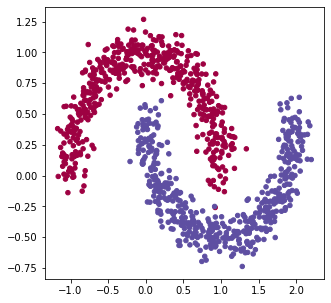

In [19]:
from sklearn.datasets import make_moons, make_blobs

#X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)
X, y = make_moons(n_samples=1000, noise=0.1)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap=plt.cm.Spectral);

In [20]:
model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

len(model.parameters())

6

In [21]:
loss_fn = nn.BCELoss()
optimizer = pg.optim.Adam(model.parameters())

In [22]:
num_epochs = 200
batch_size = 50

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [24]:
n_train = len(X_train)

training_losses = []
validation_losses = []

X_test = pg.Tensor(X_test)
y_test = pg.Tensor(y_test)

# Training loop
for epoch in range(1, num_epochs+1):
    # Shuffle the dataset at the beginning of each epoch
    indices = np.arange(n_train)
    np.random.shuffle(indices)
    X_shuffled = X_train[indices]
    y_shuffled = y_train[indices]

    epoch_loss = 0
    for i in range(0, n_train, batch_size):
        # Mini-batch
        X_batch = pg.Tensor(X_shuffled[i:i + batch_size])
        y_batch = pg.Tensor(y_shuffled[i:i + batch_size])

        # Forward pass
        y_pred = model(X_batch)

        # Compute loss
        loss = loss_fn(y_pred, y_batch)
        epoch_loss += loss

        # Backward pass
        loss.backward()

        # Update model parameters
        optimizer.step()
        optimizer.zero_grad()

     # Compute average training loss for the epoch
    training_losses.append(epoch_loss.numpy() / (len(X_shuffled) / batch_size))

    # Compute validation loss
    y_pred_val = model(X_test)
    val_loss = loss_fn(y_pred_val, y_test)
    validation_losses.append(val_loss.numpy())

    if epoch % 10 == 0 or epoch < 10:
        print(f"Epoch {epoch}, Training Loss: {training_losses[-1]}, Validation Loss: {validation_losses[-1]}")

Epoch 1, Training Loss: [35.06898035], Validation Loss: [69.25805483]
Epoch 2, Training Loss: [34.84171032], Validation Loss: [68.92620779]
Epoch 3, Training Loss: [34.85448628], Validation Loss: [69.77673022]
Epoch 4, Training Loss: [34.72832747], Validation Loss: [69.26908294]
Epoch 5, Training Loss: [34.70575749], Validation Loss: [69.39126772]
Epoch 6, Training Loss: [34.6897269], Validation Loss: [69.58442871]
Epoch 7, Training Loss: [34.6914227], Validation Loss: [69.70764378]
Epoch 8, Training Loss: [34.73101508], Validation Loss: [70.11038018]
Epoch 9, Training Loss: [34.80823194], Validation Loss: [68.98634067]
Epoch 10, Training Loss: [34.84990693], Validation Loss: [70.24942809]
Epoch 20, Training Loss: [34.7419375], Validation Loss: [69.91782441]
Epoch 30, Training Loss: [34.80262256], Validation Loss: [70.87670566]
Epoch 40, Training Loss: [34.78691787], Validation Loss: [69.03756931]
Epoch 50, Training Loss: [34.77781606], Validation Loss: [69.04833841]
Epoch 60, Training

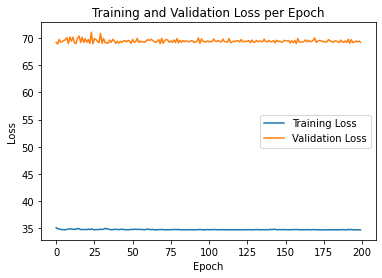

In [25]:
# Plotting the training and validation loss
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Epoch')
plt.legend()
plt.show()

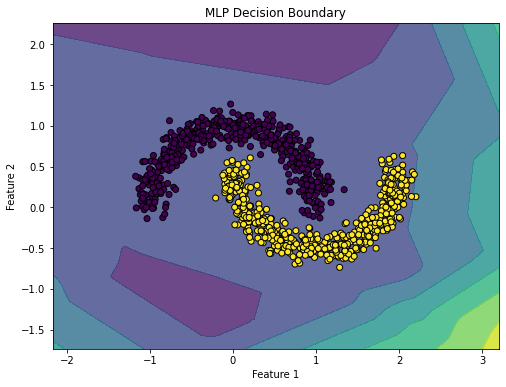

In [27]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict values across the grid
grid = pg.Tensor(np.c_[xx.ravel(), yy.ravel()])
probs = model(grid).reshape(xx.shape)

# Plot the decision boundary using contourf
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, probs.numpy(), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('MLP Decision Boundary')
plt.show()